In [33]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 

In [34]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fifa/results.csv")
df_results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [36]:
df_rankings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa/fifa_ranking.csv')
df_rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [37]:
df_rankings = df_rankings.replace({"IR Iran":"Iran"})
df_rankings['weighted_points'] = df_rankings['cur_year_avg_weighted'] + df_rankings['two_year_ago_weighted'] + df_rankings['three_year_ago_weighted']
df_rankings['rank_date'] = pd.to_datetime(df_rankings['rank_date'])
df_rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,weighted_points
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,0.0
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,0.0
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,0.0
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,0.0
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,0.0


In [43]:
import datetime
df_results['date'] = pd.to_datetime(df_results['date'])
df_results = df_results.query("date >= '2015-01-01'").reset_index(drop=True)
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2015-01-04,Bahrain,Jordan,1.0,0.0,Friendly,Ballarat,Australia,True
1,2015-01-04,Iran,Iraq,1.0,0.0,Friendly,Wollongong,Australia,True
2,2015-01-04,South Korea,Saudi Arabia,2.0,0.0,Friendly,Parramatta,Australia,True
3,2015-01-04,South Africa,Zambia,1.0,0.0,Friendly,Johannesburg,South Africa,False
4,2015-01-05,China PR,Oman,4.0,1.0,Friendly,Penrith,Australia,True


In [38]:
df_rankings["rank_date"] = pd.to_datetime(df_rankings["rank_date"]) 
df_rankings = df_rankings[(df_rankings["rank_date"] >= "2015-01-01")].reset_index(drop=True)

In [39]:
df_rankings["country_full"] = df_rankings["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [46]:
# 국가별로 & date 별로 리샘플링
df_rankings = df_rankings.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [49]:
df_rankings.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,weighted_points
0,2015-01-08,142.0,Afghanistan,AFG,190.34,190.0,1.0,94.6,94.6,160.06,80.03,0.0,0.0,78.55,15.71,AFC,110.31
1,2015-01-09,142.0,Afghanistan,AFG,190.34,190.0,1.0,94.6,94.6,160.06,80.03,0.0,0.0,78.55,15.71,AFC,110.31
2,2015-01-10,142.0,Afghanistan,AFG,190.34,190.0,1.0,94.6,94.6,160.06,80.03,0.0,0.0,78.55,15.71,AFC,110.31
3,2015-01-11,142.0,Afghanistan,AFG,190.34,190.0,1.0,94.6,94.6,160.06,80.03,0.0,0.0,78.55,15.71,AFC,110.31
4,2015-01-12,142.0,Afghanistan,AFG,190.34,190.0,1.0,94.6,94.6,160.06,80.03,0.0,0.0,78.55,15.71,AFC,110.31


In [57]:
df = df_results
df = df.merge(df_rankings, 
                          left_on = ['date', 'home_team'],
                          right_on = ['rank_date', 'country_full'])
df = df.merge(df_rankings,
              left_on= ['date', 'away_team'],
              right_on = ['rank_date', 'country_full'], suffixes=('_home', '_away'))
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,confederation_away,weighted_points_away
0,2015-01-09,Australia,Kuwait,4.0,1.0,AFC Asian Cup,Melbourne,Australia,False,2015-01-09,...,99.32,99.32,153.51,76.76,95.79,28.74,181.73,36.35,AFC,164.41
1,2015-01-09,Senegal,Gabon,1.0,0.0,Friendly,Casablanca,Morocco,True,2015-01-09,...,316.25,316.25,157.68,78.84,374.00,112.20,98.78,19.76,CAF,448.21
2,2015-01-10,Cameroon,South Africa,1.0,1.0,Friendly,Libreville,Gabon,True,2015-01-10,...,321.81,321.81,333.67,166.84,146.72,44.01,273.01,54.60,CAF,420.42
3,2015-01-10,South Korea,Oman,1.0,0.0,AFC Asian Cup,Canberra,Australia,True,2015-01-10,...,131.60,131.60,241.76,120.88,161.15,48.34,227.70,45.54,AFC,225.48
4,2015-01-10,Saudi Arabia,China PR,0.0,1.0,AFC Asian Cup,Brisbane,Australia,True,2015-01-10,...,152.38,152.38,162.33,81.16,180.03,54.01,255.57,51.11,AFC,257.50


In [58]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'cur_year_avg_home', 'cur_year_avg_weighted_home', 'last_year_avg_home',
       'last_year_avg_weighted_home', 'two_year_ago_avg_home',
       'two_year_ago_weighted_home', 'three_year_ago_avg_home',
       'three_year_ago_weighted_home', 'confederation_home',
       'weighted_points_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'cur_year_avg_away',
       'cur_year_avg_weighted_away', 'last_year_avg_away',
       'last_year_avg_weighted_away', 'two_year_ago_avg_away',
       'two_year_ago_weighted_away', 'three_year_ago_avg_away',
       'three_year_ago_weighted_away', 'confederation_away',
       'w

In [59]:
df = df[['home_score','away_score','neutral','rank_home','total_points_home','rank_away','total_points_away']]

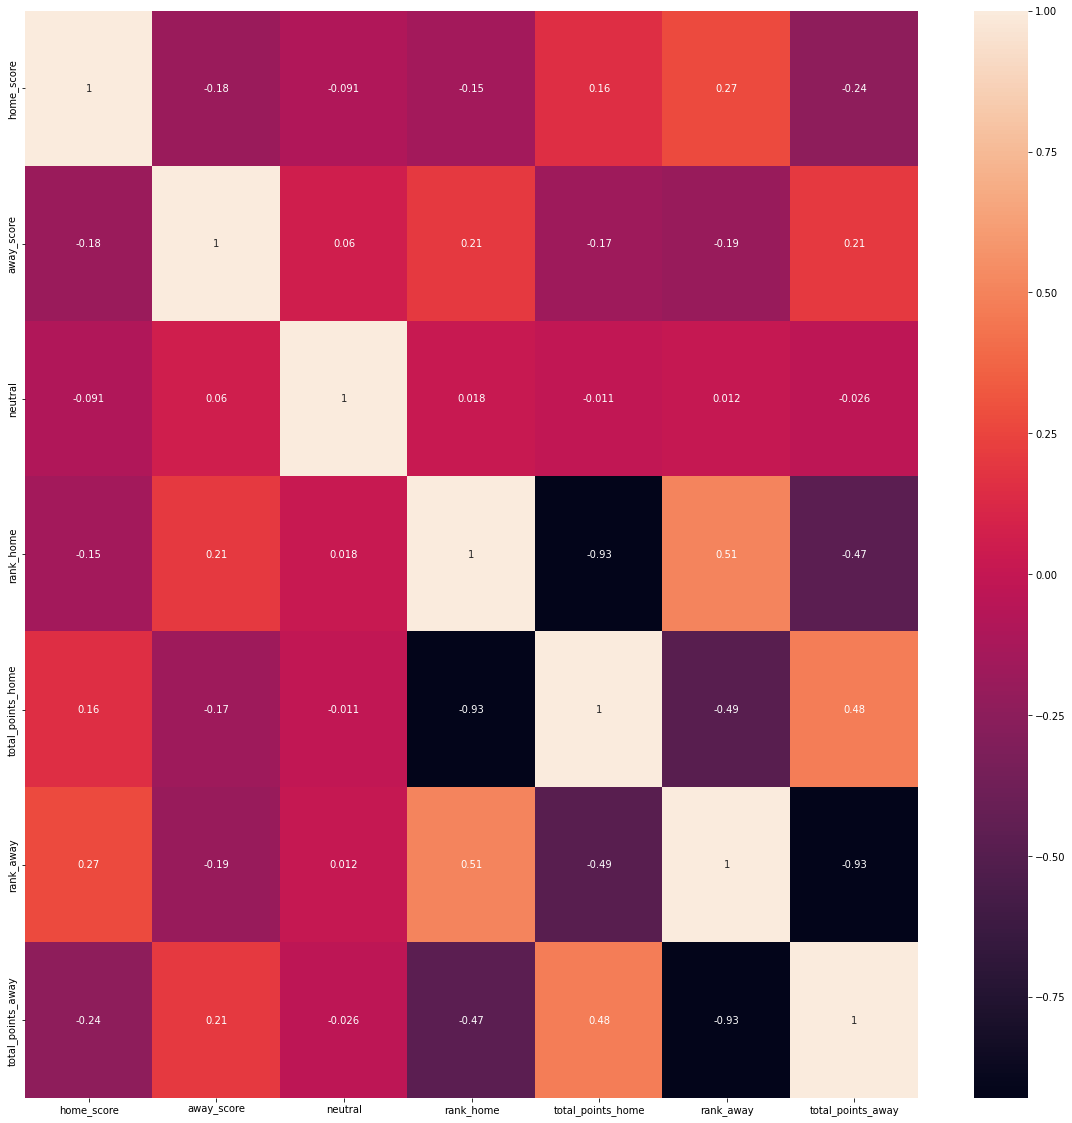

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = df.corr()
sns.heatmap(corr1, annot=True)

In [68]:
%cd /content/drive/MyDrive/Colab Notebooks/FIFA_bigdata.ipynb

[Errno 20] Not a directory: '/content/drive/MyDrive/Colab Notebooks/FIFA_bigdata.ipynb'
/content


In [66]:
!git config --global user.email "mjwoo0@naver.com"
!git config --global user.name "freemjstudio"


In [67]:
!git remote add origin https://github.com/2022-FIFA-World-Cup-Qatar-BigData/heatmap
!git commit -m "90"
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
